<a href="https://colab.research.google.com/github/JzBreno/APISqlite3/blob/main/NUVEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando Pacotes

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Criando DataFrame para visualização e limpeza de dados

In [39]:
caminho_csv = '/content/sample_data/relatoriodoparquedeiluminacaopublica.xlsx'
df = pd.read_excel(caminho_csv)

checando cabeçalhos

In [40]:
df.info()#checando informações e cabeçalhos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182514 entries, 0 to 182513
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CÓDIGO_DE_PONTO_DE_SERVIÇO  182514 non-null  object
 1   PONTO_DE_SERVIÇO_X          182514 non-null  object
 2   PONTE_DE_SERVIÇO_Y          182514 non-null  object
 3   REGIÃO                      182514 non-null  object
 4   NATUREZA_LOGRADOURO         182514 non-null  object
 5   DESIGNAÇÃO_LOGRADOURO       182514 non-null  object
 6   DESIGNAÇÃO_BAIRRO           182514 non-null  object
 7   POSTE                       182514 non-null  object
 8   LÂMPADA                     182514 non-null  object
 9   POTÊNCIA_NOMINAL            182514 non-null  int64 
 10  POTÊNCIA_CONSUMIDA          182514 non-null  int64 
 11  FAMILIA_LÂMPADA             182514 non-null  object
 12  CÓDIGO_ALIMENTAÇÃO          182514 non-null  object
 13  ALIMENTAÇÃO                 1

In [41]:
df['POTÊNCIA_NOMINAL'].shape #usando potencia nominal para checar quantidade de entradas

(182514,)

checando tipos

In [42]:
df.dtypes #analisando tipos de dados do nosso dataframe

,0
CÓDIGO_DE_PONTO_DE_SERVIÇO,object
PONTO_DE_SERVIÇO_X,object
PONTE_DE_SERVIÇO_Y,object
REGIÃO,object
NATUREZA_LOGRADOURO,object
DESIGNAÇÃO_LOGRADOURO,object
DESIGNAÇÃO_BAIRRO,object
POSTE,object
LÂMPADA,object
POTÊNCIA_NOMINAL,int64


checando se há ausencias

In [43]:
nulos = df.isnull().sum() #checando quantos dados nulos tem cada variavel e agrupando pelos cabeçalhos
print(nulos)#printando resultado, percebemos que tem 0 entradas nulas

CÓDIGO_DE_PONTO_DE_SERVIÇO    0
PONTO_DE_SERVIÇO_X            0
PONTE_DE_SERVIÇO_Y            0
REGIÃO                        0
NATUREZA_LOGRADOURO           0
DESIGNAÇÃO_LOGRADOURO         0
DESIGNAÇÃO_BAIRRO             0
POSTE                         0
LÂMPADA                       0
POTÊNCIA_NOMINAL              0
POTÊNCIA_CONSUMIDA            0
FAMILIA_LÂMPADA               0
CÓDIGO_ALIMENTAÇÃO            0
ALIMENTAÇÃO                   0
NÚMERO_ORDEM                  0
dtype: int64


In [44]:
df['POTÊNCIA_NOMINAL']#analisando potencia


,POTÊNCIA_NOMINAL
0,400
1,400
2,400
3,150
4,150
...,...
182509,250
182510,70
182511,150
182512,150


In [45]:
contagem_potencia = df['POTÊNCIA_NOMINAL'].value_counts() #checando contagem e analisando quantas variações de potencia existem na base
print(contagem_potencia)#printando potencias

POTÊNCIA_NOMINAL
70      63798
150     49226
250     30678
400     26740
100      9833
1000      849
600       619
35        184
11        138
32         87
14         67
50         60
12         50
9          48
46         48
17         38
15         16
290        11
30          9
18          5
13          5
25          3
45          1
7           1
Name: count, dtype: int64


Separando valores em listas para melhor tratamento e plotagem do grafico

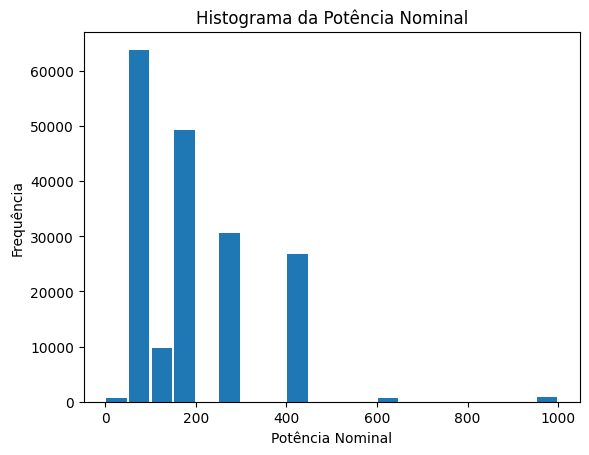

In [46]:
valores = [70, 150, 250, 400, 100, 1000, 600, 35, 11, 32, 14, 50, 12, 9, 46, 17, 15, 290, 30, 18, 13, 25, 45, 7]#lista de valores de potencia
frequencias = [63798, 49226, 30678, 26740, 9833, 849, 619, 184, 138, 87, 67, 60, 50, 48, 48, 38, 16, 11, 9, 5, 5, 3, 1, 1]#lista do agrupamento da soma de cada uma das potencias
plt.hist(valores,bins=range(0, 1050, 50),weights=frequencias,rwidth=0.9)
#usaremos o pyplot para fazer graficos
plt.xlabel('Potência Nominal')#rotulamdo eixo x
plt.ylabel('Frequência')#rotulamdo eixo x
plt.title('Histograma da Potência Nominal')#rotulamdo grafico
plt.show()

Quantidade de luminarias

In [47]:
quantidade_luminarias = len(df['NÚMERO_ORDEM'])#analisando qtd de luminarias
quantidade_luminarias#mostrando quantidade

182514

criando logica de horarios

In [48]:
#logica de horarios
horas = np.arange(18, 30)#gerar sequencia de numeros de 18 ate 29, 24h+5h
horas = horas % 24#ajustando as 24hrs
horas
#no formato de 24+12

array([18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5])

In [49]:
#funcao que retorna valor aleatorio
def movimenta_lampada():
  return np.random.poisson(lam=2.0)

print("valor aleatorio gerado: ",movimenta_lampada())


valor aleatorio gerado:  0


IMPLEMENTANDO DF COM LOCALIZAÇÕES PARA DESENVOLVER SISTEMA DE MOVIMENTO ALEATORIO

In [50]:
#dataframe simplificado com dados que iremos utilizar
df_movimento = df[['PONTO_DE_SERVIÇO_X','PONTE_DE_SERVIÇO_Y','POTÊNCIA_NOMINAL','FAMILIA_LÂMPADA']]
df_movimento.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182514 entries, 0 to 182513
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   PONTO_DE_SERVIÇO_X  182514 non-null  object
 1   PONTE_DE_SERVIÇO_Y  182514 non-null  object
 2   POTÊNCIA_NOMINAL    182514 non-null  int64 
 3   FAMILIA_LÂMPADA     182514 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.6+ MB


In [51]:
#checando numero de luminarias
num_luminarias = len(df_movimento)
num_luminarias

182514

In [52]:
df_movimento.head()

,PONTO_DE_SERVIÇO_X,PONTE_DE_SERVIÇO_Y,POTÊNCIA_NOMINAL,FAMILIA_LÂMPADA
0,,,400,SÓDIO
1,554469.75,9586805,400,SÓDIO
2,554469.75,9586805,400,SÓDIO
3,553758.0643,9588829.463,150,METÁLICO
4,553742.0426,9588832.29,150,METÁLICO


In [53]:
movimentacao_luminaria = []
for indice, valores_luminarias in df_movimento.iterrows():
  for hora in horas:
    move = movimenta_lampada()
    #iremos gerar um numeros entre os reais aleatorio onde 0 é desligado e 1 potencia maxima!simulando intensidade e multiplicar pela quantidade de movimento detectada
    intensidade = np.clip(np.random.uniform(0,1)*move,0,1)
    movimentacao_luminaria.append([valores_luminarias['PONTO_DE_SERVIÇO_X'],
                                   valores_luminarias['PONTE_DE_SERVIÇO_Y'],
                                   valores_luminarias['POTÊNCIA_NOMINAL'],
                                   valores_luminarias['FAMILIA_LÂMPADA'],
                                   hora, move, intensidade
                                   ])


In [54]:
for i in range(5):
  print(movimentacao_luminaria[i])

['         ', '         ', 400, 'SÓDIO        ', 18, 3, 0.7536058857263552]
['         ', '         ', 400, 'SÓDIO        ', 19, 1, 0.901650129111812]
['         ', '         ', 400, 'SÓDIO        ', 20, 1, 0.3727806175184658]
['         ', '         ', 400, 'SÓDIO        ', 21, 0, 0.0]
['         ', '         ', 400, 'SÓDIO        ', 22, 0, 0.0]


In [55]:
movimentacao_luminaria[0]

['         ', '         ', 400, 'SÓDIO        ', 18, 3, 0.7536058857263552]

In [56]:
#criando dataframe de movimentos e intensidades
df_movimento_intensidade = pd.DataFrame(movimentacao_luminaria, columns=['PONTO_DE_SERVIÇO_X','PONTE_DE_SERVIÇO_Y','POTÊNCIA_NOMINAL','FAMILIA_LÂMPADA','HORA','MOVIMENTAÇÃO','INTENSIDADE'])
df_movimento_intensidade.head(24)

,PONTO_DE_SERVIÇO_X,PONTE_DE_SERVIÇO_Y,POTÊNCIA_NOMINAL,FAMILIA_LÂMPADA,HORA,MOVIMENTAÇÃO,INTENSIDADE
0,,,400,SÓDIO,18,3,0.753606
1,,,400,SÓDIO,19,1,0.901650
2,,,400,SÓDIO,20,1,0.372781
3,,,400,SÓDIO,21,0,0.000000
4,,,400,SÓDIO,22,0,0.000000
5,,,400,SÓDIO,23,2,1.000000
6,,,400,SÓDIO,0,2,1.000000
7,,,400,SÓDIO,1,1,0.041023
8,,,400,SÓDIO,2,0,0.000000
9,,,400,SÓDIO,3,1,0.784164


In [57]:
# Agregando dados por hora para calcular a média de intensidade luminosa e movimentação
df_aggregated = df_movimento_intensidade.groupby('HORA').agg({
    'MOVIMENTAÇÃO': 'mean',
    'INTENSIDADE': 'mean'
}).reset_index()

In [58]:
# Filtrando apenas as horas entre 18h e 5h
df_aggregated_filtered = df_aggregated[(df_aggregated['HORA'] >= 18) | (df_aggregated['HORA'] <= 5)]

Treinando modelo


In [59]:
x = df_movimento_intensidade[['MOVIMENTAÇÃO','HORA']]
y = df_movimento_intensidade['INTENSIDADE']
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)#90% para treino e 10% para teste

In [60]:
# Normalizando os dados
scala = StandardScaler()
X_treino_scaled = scala.fit_transform(X_treino)
X_teste_scaled = scala.transform(X_teste)

In [61]:
y_teste

,INTENSIDADE
1308746,0.039853
932613,0.794626
128296,0.881154
1789065,1.000000
316370,0.000000
...,...
232166,0.152193
82283,0.606466
773827,1.000000
362581,0.360807


In [62]:
print('tamanho das divisoes de dados')
print(X_treino.shape)
print(X_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

tamanho das divisoes de dados
(1533117, 2)
(657051, 2)
(1533117,)
(657051,)


In [63]:
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

LinearRegression()

In [64]:
df_aggregated_filtered['PREDICAO_INTENSIDADE'] = modelo.predict(scala.transform(df_aggregated[['MOVIMENTAÇÃO', 'HORA']]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


plotando grafico de exemplo com estimativa de luminosidade e por frequencia de movimentação, dados foram gerados de forma aleatoria.

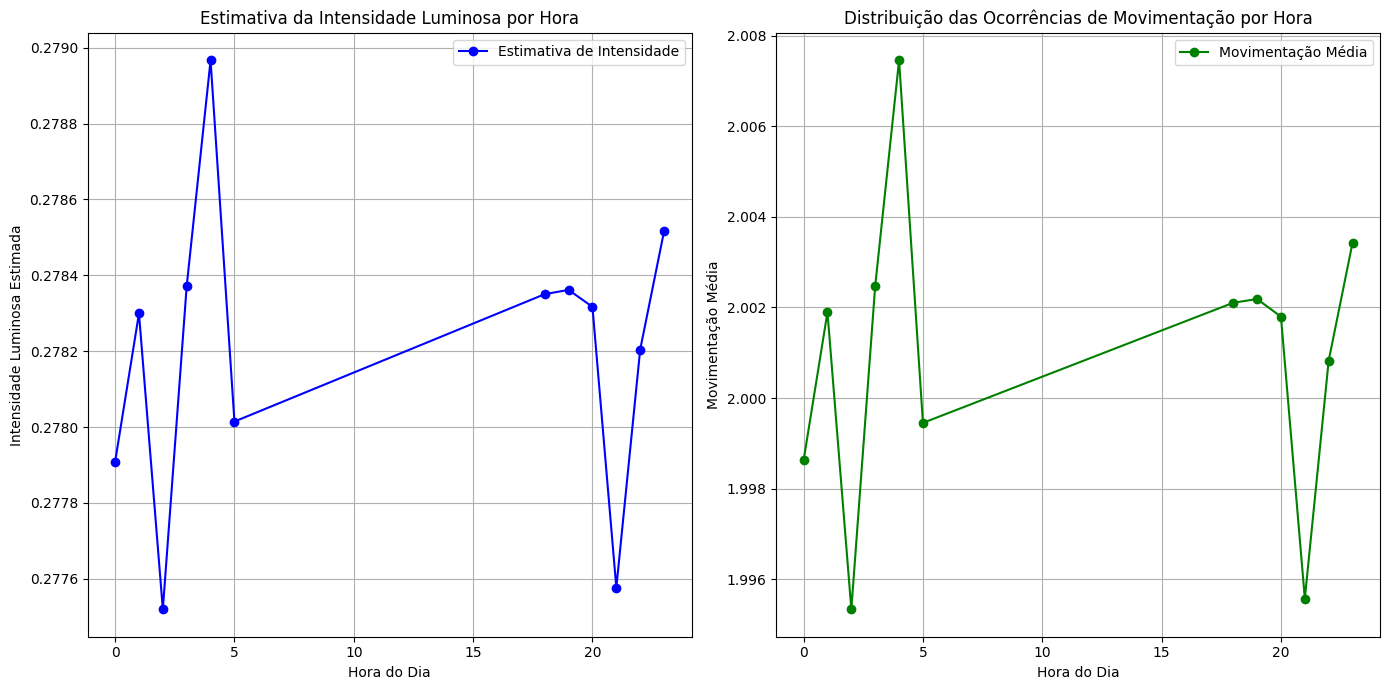

In [68]:
# Visualização
plt.figure(figsize=(14, 7))

# Gráfico da Estimativa da Intensidade Luminosa
plt.subplot(1, 2, 1)
plt.plot(df_aggregated_filtered['HORA'], df_aggregated_filtered['PREDICAO_INTENSIDADE'], marker='o', color='blue', label='Estimativa de Intensidade')
plt.xlabel('Hora do Dia')
plt.ylabel('Intensidade Luminosa Estimada')
plt.title('Estimativa da Intensidade Luminosa por Hora')
plt.grid(True)
plt.legend()

# Gráfico da Distribuição das Ocorrências de Movimentação
plt.subplot(1, 2, 2)
plt.plot(df_aggregated_filtered['HORA'], df_aggregated_filtered['MOVIMENTAÇÃO'], marker='o', color='green', label='Movimentação Média')
plt.xlabel('Hora do Dia')
plt.ylabel('Movimentação Média')
plt.title('Distribuição das Ocorrências de Movimentação por Hora')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

os pontos sao representações dos horarios